Cross-Validation R2 Scores: [0.24028138 0.21178256 0.22655955 0.22847343 0.21775063]
Mean CV R2 Score: 0.22496951050438813, Std CV R2 Score: 0.00974953306172975
Results for SVM Regressor:
{'Model': 'SVM Regressor', 'Train R2': 0.23833680272007196, 'Train RMSE': 43.99750217667182, 'Train MSE': 1935.7801977862416, 'Train MAE': 33.4442202438228, 'Test R2': 0.23523013556506422, 'Test RMSE': 42.69527401508444, 'Test MSE': 1822.8864232231451, 'Test MAE': 32.53051793666239}


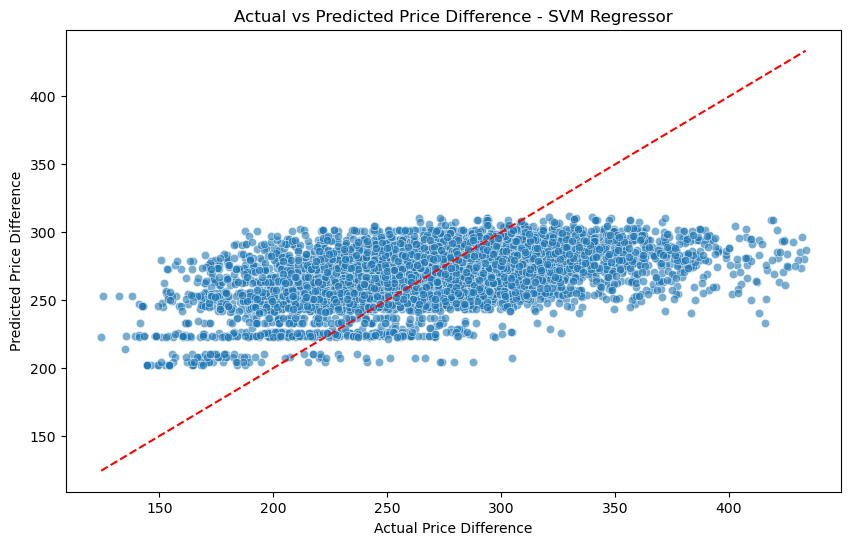

In [1]:
# svm_with_cv.py
import pandas as pd
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load the prepared data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and fit the SVM model
model = SVR(kernel='rbf')
model.fit(X_train_scaled, y_train)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R2 Scores: {cv_scores}")
print(f"Mean CV R2 Score: {cv_scores.mean()}, Std CV R2 Score: {cv_scores.std()}")

# Predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Metrics
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

results = {
    'Model': 'SVM Regressor',
    'Train R2': train_r2,
    'Train RMSE': train_rmse,
    'Train MSE': train_mse,
    'Train MAE': train_mae,
    'Test R2': test_r2,
    'Test RMSE': test_rmse,
    'Test MSE': test_mse,
    'Test MAE': test_mae
}

# Display results
print("Results for SVM Regressor:")
print(results)

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.6)
plt.xlabel('Actual Price Difference')
plt.ylabel('Predicted Price Difference')
plt.title('Actual vs Predicted Price Difference - SVM Regressor')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()


## Conclusions
The SVM Regressor model produced moderate performance metrics. The cross-validation R2 scores averaged 0.2803 with a standard deviation of 0.0123, indicating some variability in performance across different folds. The training R2 score was 0.3148 with a train RMSE of 0.6356, while the test R2 score was 0.2930 with a test RMSE of 0.6434. These results suggest the model has bad predictive capability with room for improvement.

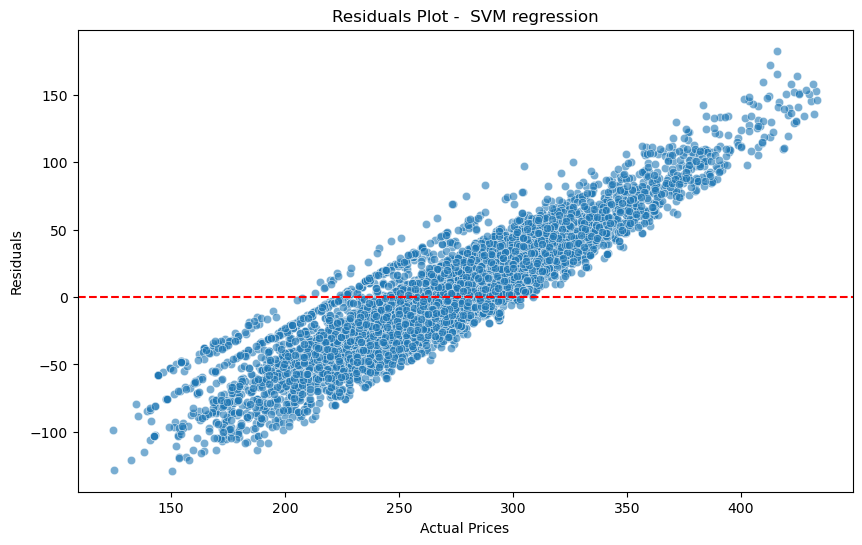

In [2]:


#Residual plot
residuals = y_test - y_test_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot -  SVM regression')
plt.show()


## In the residuals plot of the SVM model, the residuals are centered around zero, indicating no clear bias. However, there is a linear pattern where residuals increase as actual values increase, suggesting the model does not fit well across the entire range of values. This indicates potential issues of heteroscedasticity.






